# **LunarLaunch - Advantage Actor-Critic**

The implementation of Advantage Actor-Critic for LunarLunch v3.



## Initialization

In [1]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt

In [2]:
from sim.GymTrainer import GymTrainer
from framework.A2C import AdvantageActorCriticAgent

import torch
trainDevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Create the simulation environment
sim = GymTrainer(
    'LunarLander-v3', 
    evalDevice="cpu", 
    trainDevice=trainDevice, 
    render_mode='rgb_array', 
    envNum=4,
    maxEpisode=1500,
    batchSize=4,
    maxStep=1000,
    stepLimitPenalty=150,
    seed=543)

=============Initializing=============
Initializing Gym Environments of LunarLander-v3
init envs
set seeds 543


In [4]:
# Create the agent
agent = AdvantageActorCriticAgent(
    actionNum=sim.actionSize(), 
    stateNum=8, 
    gamma=0.99, 
    policyLR=0.003, 
    criticLR=0.01)

## Training

In [5]:
name, writer = sim.makeSummaryWriter(agent)
sim.train(agent, writer)

=============Start Training=============
Batch:1 	 Episode:4 	 Loss: -0.12 	 AvgAdv: -8.99 	 AvgRew: -132.50 	 FinRew: -100.00 	 LossCritic: 1.03
Batch:2 	 Episode:8 	 Loss: -0.08 	 AvgAdv: -5.82 	 AvgRew: -154.38 	 FinRew: -100.00 	 LossCritic: 1.01
Batch:3 	 Episode:12 	 Loss: -0.04 	 AvgAdv: -3.75 	 AvgRew: -190.08 	 FinRew: -100.00 	 LossCritic: 1.01
Batch:4 	 Episode:16 	 Loss: -0.02 	 AvgAdv: -1.34 	 AvgRew: -183.86 	 FinRew: -100.00 	 LossCritic: 1.00
Batch:5 	 Episode:20 	 Loss: 0.01 	 AvgAdv: 0.49 	 AvgRew: -147.52 	 FinRew: -100.00 	 LossCritic: 0.99
Batch:6 	 Episode:24 	 Loss: 0.02 	 AvgAdv: 1.76 	 AvgRew: -167.78 	 FinRew: -100.00 	 LossCritic: 0.99
Batch:7 	 Episode:28 	 Loss: 0.03 	 AvgAdv: 2.30 	 AvgRew: -168.95 	 FinRew: -100.00 	 LossCritic: 0.99
Batch:8 	 Episode:32 	 Loss: 0.05 	 AvgAdv: 3.93 	 AvgRew: -186.26 	 FinRew: -100.00 	 LossCritic: 0.98
Batch:9 	 Episode:36 	 Loss: 0.04 	 AvgAdv: 3.19 	 AvgRew: -172.01 	 FinRew: -100.00 	 LossCritic: 0.99
Batch:10 	 Episod

# Testing

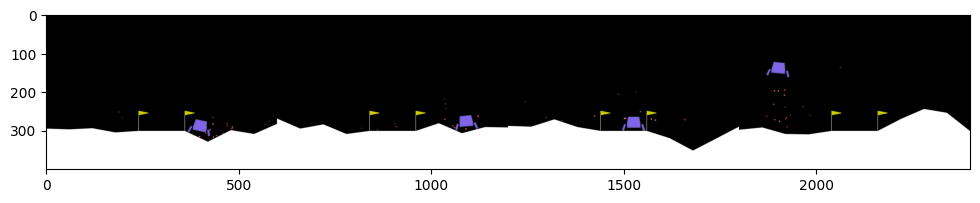

Average Total Reward:-10.114590644836426 	 Max Total Reward:48.27280807495117 	 Min Total Reward:-76.53337097167969


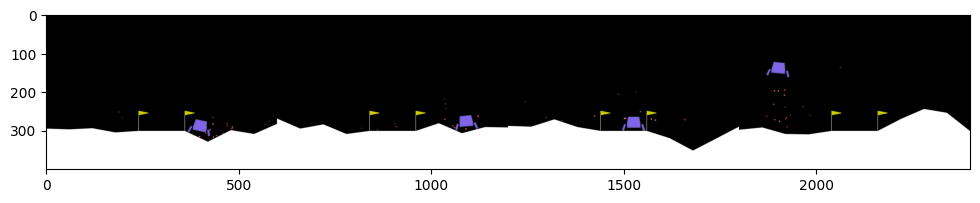

In [6]:
sim.test(
    agent = agent, 
    episode = 12, 
    maxStep = 1000, 
    renderStep = 3,
    writer = writer)

## Save

In [7]:
agent.save(name)

AdvantageActorCriticAgent(
  (policy): PolicyNetwork(
    (fc1): Linear(in_features=8, out_features=8, bias=True)
    (fc2): Linear(in_features=8, out_features=8, bias=True)
    (fc3): Linear(in_features=8, out_features=4, bias=True)
  )
  (critic): CriticNetwork(
    (fc1): Linear(in_features=8, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=16, bias=True)
    (fc3): Linear(in_features=16, out_features=1, bias=True)
  )
)

# Run saved weight

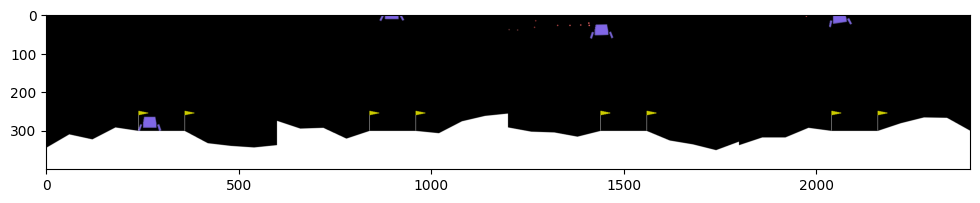

Average Total Reward:277.66070556640625 	 Max Total Reward:321.613037109375 	 Min Total Reward:235.45384216308594


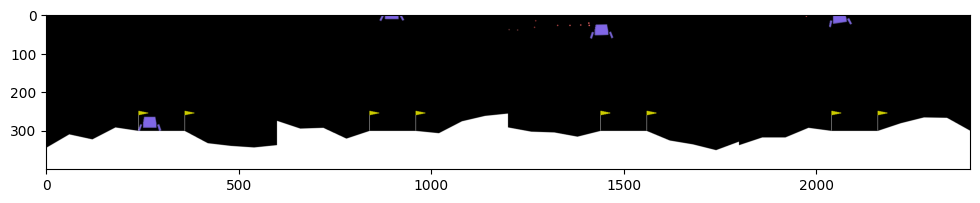

In [8]:
agent.load_state_dict(torch.load('A3C-best.pt'))
sim.test(
    agent = agent, 
    episode = 12, 
    maxStep = 1000, 
    renderStep = 3,
    writer = writer)